In [2]:
# Python Demo Code
# Date: 2023-01-25
from sympy import *
from sympy.assumptions import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math, Latex, display

In [3]:
# Define the variables and functions
t = Symbol('t')
R, L, C = symbols('R L C',positive=True) # circuit's parameters
v_C, i_L = symbols('v_C i_L', cls=Function)
# Define the differential equations
eq1 = Eq(Derivative(v_C(t), t), -i_L(t)/C)
eq2 = Eq(Derivative(i_L(t), t), v_C(t)/L - i_L(t)*R/L)
eqn = (eq1, eq2)

In [5]:
# Solve the system of differential equations using dsolve()
solutions = dsolve( eqn, ics=None )
for eq in solutions:
    display( eq )
    print(' ')

Eq(v_C(t), C1*(sqrt(C)*R - sqrt(C*R**2 - 4*L))*exp(-t*(sqrt(C)*R + sqrt(C*R**2 - 4*L))/(2*sqrt(C)*L))/(2*sqrt(C)) + C2*(sqrt(C)*R + sqrt(C*R**2 - 4*L))*exp(-t*(sqrt(C)*R - sqrt(C*R**2 - 4*L))/(2*sqrt(C)*L))/(2*sqrt(C)))

Eq(i_L(t), C1*exp(-t*(sqrt(C)*R + sqrt(C*R**2 - 4*L))/(2*sqrt(C)*L)) + C2*exp(-t*(sqrt(C)*R - sqrt(C*R**2 - 4*L))/(2*sqrt(C)*L)))

In [9]:
# Substitute numeric values for the circuit parameters
# For instance, R = 5 Ohm, C = 39 nF, L = 100 uH
params = {R:0.3, C: 100e-9,L: 100e-6}
eqn = [eq.subs( params ) for eq in eqn]
# Set the initial conditions
ics = {v_C(0): 0.0, i_L(0): 0.2}
# Solve the system of differential equations with initial conditions using dsolve()
solutions = dsolve( eqn, ics=ics )
for eq in solutions:
    display( eq ) # display the equation
    print(' ')

Eq(v_C(t), -10.1397590419143*exp(-25000.0*t)*sin(505752.168962483*t) - 1.11022302462516e-16*exp(-25000.0*t)*cos(505752.168962483*t))

Eq(i_L(t), -0.00988626506586649*exp(-25000.0*t)*sin(505752.168962483*t) + 0.2*exp(-25000.0*t)*cos(505752.168962483*t))

Eq(-10.1397590419143*exp(-25000.0*t)*sin(505752.168962483*t) - 1.11022302462516e-16*exp(-25000.0*t)*cos(505752.168962483*t), 0)

[-2.16493489801907e-23]

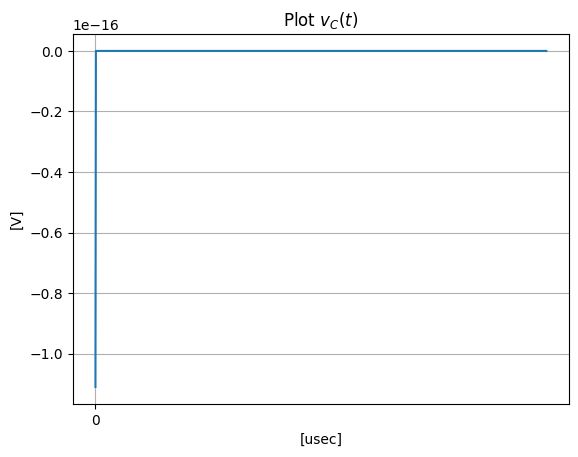

In [40]:
# Convert the solution to NumPy functions
f_np = [ lambdify(t, sol.rhs, "numpy") for sol in solutions]
v_C_np = f_np[0] # voltage across the capacitor C
i_L_np = f_np[1] # current flow through the inductor L
# Plot the voltage across the capacitor C: v_C(t)
N = 1000 # number of points
t_start, t_end = [0,100] # time steps from 0 to 100 usec
ts = np.linspace(t_start,t_end,N)
plt.plot( ts, v_C_np(ts/1e6) )
plt.xticks(np.arange(0,t_end+1,10)) # xtick resolution 10usec
plt.ylabel('[V]')
plt.xlabel('[usec]')
plt.grid( True )
plt.title('Plot $v_C(t)$')
plt.show()

-1.11022302462516e-16